In [5]:
# Fase 1 & 2: Muat Data dan Eksplorasi Cepat

import pandas as pd

# Muat dataset
# Ganti 'Superstore.csv' jika nama file Anda berbeda
file_path = '/content/Sample - Superstore.csv'
data = pd.read_csv(file_path, encoding='latin1')

# 1. Lihat 5 baris pertama untuk 'berkenalan' dengan data
print("--- 5 Baris Pertama Data ---")
print(data.head())

# 2. Lihat informasi kolom (tipe data & data hilang)
print("\n--- Info Kolom (Tipe Data & Missing Values) ---")
data.info()

# 3. Cek jumlah data duplikat
print("\n--- Jumlah Data Duplikat ---")
print(data.duplicated().sum())

# Jika ada duplikat, Anda bisa menghapusnya dengan:
# data = data.drop_duplicates()

--- 5 Baris Pertama Data ---
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Cat

In [6]:
# Fase 2 (Lanjutan): Ubah 'Order Date' menjadi format datetime
# Ini PENTING untuk analisis tren waktu

data['Order Date'] = pd.to_datetime(data['Order Date'])

# Cek lagi hasilnya
print("--- Info Kolom Setelah Diubah ---")
data.info()

--- Info Kolom Setelah Diubah ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object 

In [7]:
# 1. Apa 10 produk paling menguntungkan?
profit_produk = data.groupby('Product Name')['Profit'].sum().reset_index()
produk_teruntung = profit_produk.sort_values(by='Profit', ascending=False)

print("--- 10 Produk Paling Untung ---")
print(produk_teruntung.head(10))

--- 10 Produk Paling Untung ---
                                           Product Name      Profit
404               Canon imageCLASS 2200 Advanced Copier  25199.9280
650   Fellowes PB500 Electric Punch Plastic Comb Bin...   7753.0390
805                Hewlett Packard LaserJet 3310 Copier   6983.8836
400                  Canon PC1060 Personal Laser Copier   4570.9347
787   HP Designjet T520 Inkjet Large Format Printer ...   4094.9766
165                   Ativa V4110MDD Micro-Cut Shredder   3772.9461
19     3D Systems Cube Printer, 2nd Generation, Magenta   3717.9714
1276  Plantronics Savi W720 Multi-Device Wireless He...   3696.2820
895                Ibico EPK-21 Electric Binding System   3345.2823
1840                  Zebra ZM400 Thermal Label Printer   3343.5360


In [8]:
# 2. Bagaimana performa per Kategori?
performa_kategori = data.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

print("\n--- Performa Penjualan & Profit per Kategori ---")
print(performa_kategori)


--- Performa Penjualan & Profit per Kategori ---
          Category        Sales       Profit
0        Furniture  741999.7953   18451.2728
1  Office Supplies  719047.0320  122490.8008
2       Technology  836154.0330  145454.9481


In [9]:
# 3. Wilayah mana yang profitnya paling rendah?
profit_wilayah = data.groupby('Region')['Profit'].sum().reset_index()
wilayah_terendah = profit_wilayah.sort_values(by='Profit', ascending=True)

print("\n--- Profit Wilayah (Diurutkan dari Terendah) ---")
print(wilayah_terendah.head())


--- Profit Wilayah (Diurutkan dari Terendah) ---
    Region       Profit
0  Central   39706.3625
2    South   46749.4303
1     East   91522.7800
3     West  108418.4489


In [10]:
# 4. Siapa 10 pelanggan teratas berdasarkan penjualan?
sales_pelanggan = data.groupby('Customer Name')['Sales'].sum().reset_index()
pelanggan_teratas = sales_pelanggan.sort_values(by='Sales', ascending=False)

print("\n--- 10 Pelanggan Teratas (Sales) ---")
print(pelanggan_teratas.head(10))


--- 10 Pelanggan Teratas (Sales) ---
          Customer Name      Sales
686         Sean Miller  25043.050
730        Tamara Chand  19052.218
622        Raymond Buch  15117.339
757        Tom Ashbrook  14595.620
6         Adrian Barton  14473.571
441        Ken Lonsdale  14175.229
671        Sanjit Chand  14142.334
334        Hunter Lopez  12873.298
672        Sanjit Engle  12209.438
156  Christopher Conant  12129.072


In [11]:
# 5. Bagaimana tren penjualan bulanan?
# Kita perlu 'Order Date' sebagai index
data.set_index('Order Date', inplace=True)

# Resample data per bulan (M) dan jumlahkan Sales
penjualan_bulanan = data['Sales'].resample('M').sum()

print("\n--- Tren Penjualan Bulanan ---")
print(penjualan_bulanan)


--- Tren Penjualan Bulanan ---
Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.

/tmp/ipython-input-1522278286.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  penjualan_bulanan = data['Sales'].resample('M').sum()


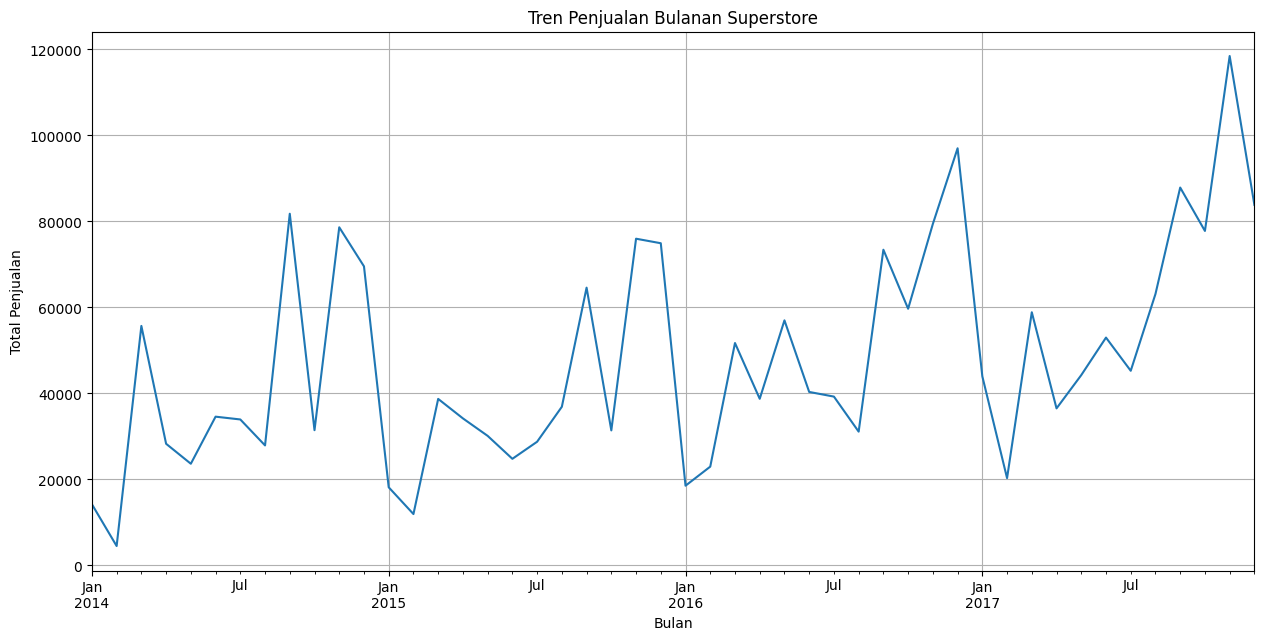

In [12]:
# Fase 4: Visualisasi Sederhana
import matplotlib.pyplot as plt

# Buat grafik garis untuk penjualan bulanan
plt.figure(figsize=(15, 7)) # Mengatur ukuran gambar
penjualan_bulanan.plot(kind='line')
plt.title('Tren Penjualan Bulanan Superstore')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.show()

Sebagai seorang analis data, saya telah meninjau dataset Superstore dan mengidentifikasi beberapa pola serta wawasan penting:

### Ringkasan Hasil Analisis Data Superstore

#### 1. Produk Paling Menguntungkan

Analisis menunjukkan bahwa **Canon imageCLASS 2200 Advanced Copier** adalah produk dengan profit tertinggi secara signifikan, mencapai **25.199,93**. Diikuti oleh beberapa produk berkinerja tinggi lainnya seperti Fellowes PB500 Electric Punch Plastic Comb Binding Machine dan Hewlett Packard LaserJet 3310 Copier. Ini menunjukkan bahwa produk-produk berteknologi tinggi, khususnya *copier* dan *printer*, memiliki margin keuntungan yang sangat baik.

**10 Produk Paling Untung:**
*   Canon imageCLASS 2200 Advanced Copier: 25199.9280
*   Fellowes PB500 Electric Punch Plastic Comb Binding Machine: 7753.0390
*   Hewlett Packard LaserJet 3310 Copier: 6983.8836
*   Canon PC1060 Personal Laser Copier: 4570.9347
*   HP Designjet T520 Inkjet Large Format Printer with Wireless Connectivity: 4094.9766

#### 2. Performa Penjualan dan Keuntungan per Kategori

*   **Technology** memimpin dalam hal penjualan (`836.154,03`) dan profit (`145.454,95`), menjadikannya kategori paling berharga bagi Superstore.
*   **Office Supplies** juga menunjukkan performa profit yang kuat (`122.490,80`) dengan volume penjualan yang sedikit di bawah Teknologi (`719.047,03`).
*   Namun, **Furniture** memiliki performa profit yang jauh lebih rendah (`18.451,27`) meskipun penjualannya cukup tinggi (`741.999,80`). Ini mengindikasikan adanya masalah margin atau biaya tinggi dalam kategori ini.

**Performa Penjualan & Profit per Kategori:**
*   Furniture: Sales 741999.7953, Profit 18451.2728
*   Office Supplies: Sales 719047.0320, Profit 122490.8008
*   Technology: Sales 836154.0330, Profit 145454.9481

#### 3. Wilayah dengan Profit Terendah

Wilayah **Central** tercatat sebagai wilayah dengan profit terendah (`39.706,36`), diikuti oleh **South** (`46.749,43`). Ini menunjukkan bahwa kedua wilayah ini mungkin memerlukan perhatian lebih untuk meningkatkan strategi penjualan atau efisiensi operasional guna meningkatkan profitabilitas.

**Profit Wilayah (Diurutkan dari Terendah):**
*   Central: 39706.3625
*   South: 46749.4303
*   East: 91522.7800
*   West: 108418.4489

#### 4. Pelanggan Teratas Berdasarkan Penjualan

**Sean Miller** adalah pelanggan teratas dengan total penjualan sebesar **25.043,05**. Daftar pelanggan teratas ini menyoroti individu-individu yang sangat loyal atau melakukan pembelian besar, yang merupakan aset penting bagi Superstore.

**10 Pelanggan Teratas (Sales):**
*   Sean Miller: 25043.050
*   Tamara Chand: 19052.218
*   Raymond Buch: 15117.339
*   Tom Ashbrook: 14595.620
*   Adrian Barton: 14473.571

#### 5. Tren Penjualan Bulanan

Grafik tren penjualan bulanan menunjukkan **pola musiman yang jelas**, dengan peningkatan penjualan yang signifikan menjelang akhir tahun (terutama November dan Desember). Ini konsisten dengan pola belanja liburan. Terdapat juga tren peningkatan penjualan secara keseluruhan dari tahun ke tahun.

**Tren Penjualan Bulanan:**
*   Terdapat peningkatan penjualan yang konsisten menjelang akhir tahun.
*   Penjualan cenderung menurun pada awal tahun.
*   Secara keseluruhan, tren penjualan menunjukkan pertumbuhan dari tahun ke tahun.

### Rekomendasi:

1.  **Fokus pada Kategori Teknologi dan Produk Berprofit Tinggi:** Pertahankan dan kembangkan strategi untuk kategori Teknologi dan produk-produk berprofit tinggi seperti *copier* dan *printer* karena mereka adalah pendorong profit utama.
2.  **Tinjau Ulang Kategori Furniture:** Lakukan analisis lebih lanjut mengapa kategori Furniture memiliki profit yang rendah. Ini bisa melibatkan penyesuaian harga, negosiasi ulang dengan pemasok, atau mengidentifikasi produk-produk furniture yang merugi dan menguranginya.
3.  **Tingkatkan Performa di Wilayah Central dan South:** Selidiki penyebab rendahnya profit di wilayah Central dan South. Apakah ada persaingan yang ketat, permintaan pasar yang berbeda, atau masalah operasional? Kembangkan kampanye pemasaran atau penawaran produk yang ditargetkan untuk wilayah ini.
4.  **Program Loyalitas Pelanggan:** Pertimbangkan untuk mengembangkan atau meningkatkan program loyalitas untuk pelanggan teratas untuk mempertahankan dan mendorong pembelian berulang dari mereka.
5.  **Optimalkan Musim Puncak:** Manfaatkan periode penjualan puncak di akhir tahun dengan kampanye pemasaran yang agresif, manajemen inventaris yang efisien, dan penawaran khusus.